## 2 Graph Optimization Problems

### 2.1 Graph 

A <b>graph</b> is a set of objects called <b>nodes(节点) (or vertices(顶)</b> connected by a set of <b>edges（边) (or arcs(弧))</b>.

If the edges are <b>unidirectional(单向的）</b> the graph is called <b>a directed graph or digraph</b>.

In <b>a directed graph</b>, if there is an edge from $n1$ to $n2$, we refer to $n1$ as the <b>source or parent node</b> and $n2$ as <b>the destination or child node</b>.

![](./img/ds/unanddirgraph.jpg)

A graph is **complete** if there is an edge from each vertex to every other vertex. the Figure  shows the complete graph


![](./img/ds/compgraph.jpg)

---


### 2.2 Representations of Graphs

To represent graphs, you need a convenient way to store the vertices and the edges that connect them.

The two commonly used representations of graphs are the **adjacency matrix(邻接矩阵)** and the **adjacency list(邻接表)**

#### 2.2.1 Adjacency Matrix

The adjacency matrix representation stores the information about a graph in a matrix or grid。 

Recall that a matrix has two dimensions, and each cell is accessed at a given row and column position. 

Assume that a graph has $N$ vertices labeled $0, 1, . . ., N – 1$, and then the following applies:

* The adjacency matrix for the graph is a grid $G$ with $N$ rows and $N$ columns.

* The cell $G[i][j]$ contains $1$ if there is an edge from vertex $i$ to vertex $j$ in the graph. Otherwise,there is no edge, and that cell contains $0$.

The Figure shows a directed graph and its adjacency matrix. Each node in the graph is labeled with a letter. Next to each node is its row number in the adjacency matrix.

![dirgraph-am](./img/ds/dirgraph-am.jpg)

If the graph is **undirected**, then `four more` cells are occupied by $1$ to account for the **bidirectional** character of each edge. see the Figure.


![undirgraph-am](./img/ds/undirgraph-am.jpg)

#### 2.2.2 Adjacency List

The follow Figure shows a directed graph and its adjacency list representation.

An adjacency list representation stores the information about a graph in an array of lists. 

You can use either linked or array-based list implementations. 

This example uses a linked list implementation.

Assume that a graph has $N$ vertices labeled $0, 1, . . ., N – 1$, and then the following applies:

* The adjacency list for the graph is an array of $N$ linked lists.

* The $i$th linked list contains a node for vertex $j$ if and only if there is an edge from vertex $i$ to vertex $j$.

![dirgraph-al](./img/ds/dirgraph-al.jpg)

Note that the labels of the vertices are included in the nodes for each edge. Naturally, there would be twice as many nodes in an undirected graph,see the Figure.

![undirgraph-al](./img/ds/undirgraph-al.jpg)

When the edges have weights, the weights can also be included as a second data field in the nodes, as shown in the Figure

![dirgraph-alw](./img/ds/dirgraph-alw.jpg)



#### 2.2.3 Analysis of the Two Representations

As far as running time is concerned, the behavior of two commonly used graph operations illustrates the difference in `computational efficiency` between the adjacency matrix and the adjacency list. 

##### Operations
These operations are the following:

* Determine whether or not there is an **edge** between two given vertices.

* Find `all the vertices adjacent` to a given vertex

**Determine whether or not there is an `edge` between two given vertices**

* The `adjacency matrix` supports the first operation in **constant time** because it requires just an **index** operation into a two-dimensional array. 

* The linked `adjacency list` requires an index into `an array of linked lists` and then a search of a linked list for a target vertex. 

  * The running time is `linear with the length of this list`$O(N)$, on the average. 

**Find all the vertices adjacent  to a given vertex**

The `adjacency list` tends to support finding all the vertices adjacent to a given vertex `more efficiently` than the adjacency matrix.

* In the adjacency list, the set of adjacent vertices for a given vertex is simply the list for that vertex, which can be located with one **index** operation.

The set of adjacent vertices for a given vertex in the `adjacency  matrix` must be computed by traversing that vertex’s row in the matrix and accumulating just those positions that contain $1$. 

The operation must always visit $N$ cells in the adjacency matrix, whereas the operation typically visits much fewer than $N$ nodes in an adjacency list. 


##### Memory
As far as memory usage is concerned, 

the `adjacency matrix` always requires $N^2$ cells, no matter how many edges connect the vertices. Thus, the only case in which no cells are wasted is that of a complete graph.

the `adjacency list` requires an array of $N$ pointers and a number of nodes equal to twice the number of edges in the case of an undirected graph. The number of edges typically is much smaller than $N^2$



##### Comparison

$V$: numbers of  vertexs

$E$: numbers of edges


![](./img/ds/graph-comp.png)

### 2.3 The Graph Class 

#### 2.3.1 The class :Node

The follow code contains classes implementing abstract types corresponding to nodes, weighted edges, and edges.

In [1]:
class Node:
    def __init__(self, name):
        """Assumes name is a string"""
        self._name = name
    def get_name(self):
        return self._name
    def __str__(self):
        return self._name

class Edge:
    def __init__(self, src, dest):
        """Assumes src and dest are nodes"""
        self._src = src
        self._dest = dest
    def get_source(self):
        return self._src
    def get_destination(self):
        return self._dest
    def __str__(self):
        return self._src.get_name() + '->' + self._dest.get_name()

class Weighted_edge(Edge):
    def __init__(self, src, dest, weight = 1.0):
        """Assumes src and dest are nodes, weight a number"""
        super().__init__(self, src, dest)
        self._weight = weight
    
    def get_weight(self):
        return self._weight
    
    def __str__(self):
        return (f'{self._src.get_name()}->({self._weight})' +
               f'{self._dest.get_name()}')

####  2.3.2 The classes `Digraph` and `Graph`

The codes contains implementations of the classes

* <b>Digraph</b> 

* <b>Graph</b>

In the code，we use <b style="color:blue">the adjacency list</b> representation. 

Class <b>Digraph</b> has two instance variables:

* <b>nodes</b> is a Python list containing the names of the nodes in the Digraph. The connectivity of the nodes is represented using an adjacency list implemented as a `dictionary`.

* <b>edges</b> is `a dictionary` that maps each Node in the Digraph to a **list** of the children of that Node: **the adjacency list**
```python
 self.edges[src].append(dest)
```

![](./img/ds/17.9.PNG) 


**The adjacency list representation:**

```python
{ 0: [1, 2], 
  1: [2,0],
  2: [3,4],
  3: [4,5,1],
  4: [0],
  5:[]
```



Class **Graph** is a subclass of `Digraph`. It inherits all of the methods of Digraph except `addEdge`, which it overrides.

* The Class `Graph` stores each edge **twice**, once for each direction in the Digraph. This is not the most space-efficient way to implement Graph,but it has the virtue of simplicity

In [67]:
class Digraph:
    # nodes is a list of the nodes in the graph
    # edges is a dict mapping each node to a list of its children
    def __init__(self):
        self._nodes = []
        self._edges = {}
        
    def add_node(self, node):
        if node in self._nodes:
            raise ValueError('Duplicate node')
        else:
            self._nodes.append(node)
            self._edges[node] = []
    
    def add_edge(self, edge):
        src = edge.get_source()
        dest = edge.get_destination()
        if not (src in self._nodes and dest in self._nodes):
            raise ValueError('Node not in graph')
        self._edges[src].append(dest)
    
    def children_of(self, node):
        return self._edges[node]
    
    def has_node(self, node):
        return node in self._nodes
    
    def __str__(self):
        result = ''
        for src in self._nodes:
            for dest in self._edges[src]:
                result = (result + src.get_name() + '-> '
                         + dest.get_name() + '\n')
        return result[:-1] #omit final newline
    
    def display(self): 
        result="Node -> Adjacency List:\n" 
        for src in self._nodes:
            result +="Node {:2s}->[".format(src.get_name())
            for dest in self._edges[src]:
                 result +="{:2s} ".format(dest.get_name())
            result +="]\n"
        return result 

class Graph(Digraph):
    
    def add_edge(self, edge):
        super().add_edge(self, edge)
        rev = Edge(edge.get_destination(), edge.get_source())
        super().add_edge(self, rev)
 

In [73]:
nodes = []
for name in range(6): #Create 6 nodes
    nodes.append(Node(str(name)))
g = Digraph()
for n in nodes:
    g.add_node(n)

g.add_edge(Edge(nodes[0],nodes[1]))
g.add_edge(Edge(nodes[0],nodes[2]))

g.add_edge(Edge(nodes[1],nodes[0]))
g.add_edge(Edge(nodes[1],nodes[2]))

g.add_edge(Edge(nodes[2],nodes[3]))
g.add_edge(Edge(nodes[2],nodes[4]))

g.add_edge(Edge(nodes[3],nodes[4]))
g.add_edge(Edge(nodes[3],nodes[5]))
g.add_edge(Edge(nodes[3],nodes[1]))
g.add_edge(Edge(nodes[4],nodes[0]))
print(g.display())

Node -> Adjacency List:
0 ->[1  2  ]
1 ->[0  2  ]
2 ->[3  4  ]
3 ->[4  5  1  ]
4 ->[0  ]
5 ->[]



### 2.4 Some Classic Graph-Theoretic Problems

Some of the best-known graph optimization problems are:

* <b>Shortest path</b>. For some pair of nodes, $𝑛1$ and $𝑛2$, find the shortest sequence of edges $<S_𝑛, D_𝑛>$ (source node and destination node), such that

  * The source node in the first edge is $n1$
  * The destination node of the last edge is $n2$
  * For all edges $e1$ and $e2$ in the sequence, if $e2$ follows $e1$ in the sequence, the source node of $e2$ is the destination node of $e1$.


* <b>Shortest weighted path</b>. This is like the shortest path, except instead of choos-ing the shortest sequence of edges that connects two nodes, we define some function on the weights of the edges in the sequence (e.g., their sum) and min-imize that value. This is the kind of problem solved by Google and Apple Maps when asked to compute driving directions between two points.

    
* <b>Min cut</b>. Given two sets of nodes in a graph, a <b>cut</b> is a set of edges whose removal <b>eliminates all paths</b> from each node in one set to each node in the other.The minimum cut is the smallest set of edges whose removal accomplishes this.


* <b>Maximum clique</b>. A clique is a set of nodes such that there is an edge between each pair of nodes in the set. A maximum clique is a clique of the largest size in a graph. The minimum cut is the smallest set of edges whose removal ac-complishes this. 



### 2.5 The Shortest Path

It is often useful to determine **the shortest path** between two vertices in a graph. Consider an airline map, represented as a weighted directed graph whose weights represent miles between airports.

The shortest path between two airports is the path that has the smallest sum of edge weights.

The **single-source shortest-path problem** asks for a solution that contains the shortest paths from a given vertex to all the other vertices.


#### 2.5.1 Depth-first search (DFS)
 
The algorithm implemented by DFS is an example of a recursive <b>depth-first search (DFS)深度优先搜索 </b> algorithm.

In general, a depth-first-search algorithm begins by choosing one child of the start node. It then chooses one child of that node and so on, going deeper and deeper until it either reaches the goal node or a node with no children. 

The search then <b>backtracks</b>, returning to <b>the most recent node with children that it has not yet visited</b>. 


* 深度优先搜索首先选择一个节点作为起始节点，然后，选择这个节点的一个子节点，继续这个过程，越走越深，直到到达目标节点或者没有子节点的节点，之后，开始回溯，退回到子节点没有被访问的最近节点

<img src="./img/ds/dfs.jpg"/> 

When all paths have been explored, it chooses the shortest path (assuming that there is one) from the start
to the goal.

The follow code is a bit more complicated than the algorithm we just described：

1. It has to deal with the possibility of the graph containing **cycles**.

2. It also avoids exploring paths longer than the shortest path that it has already found

In the follow code DFS 

* The function `shortest_path` calls `DFS` with `path = []` (to indicate that the current path being explored is empty) and `shortest = None` (to indicate that no path from start to end has yet been found).

*  DFS begins by choosing one child of `start`. It then chooses one child of that node and so on, until either it reaches the node end or a node with no unvisited children.
  
  * The check ```if node not in path``` prevents the program from getting caught in a cycle.

  * The check ```if shortest == None or len(path) < len(shortest)``` is used to decide if it is possible that continuing to search this path might yield a shorter path than the best path found so far.
  * If so, DFS is called recursively. If it finds a path to end that is no longer than the best found so far, `shortest` is updated.

  * When the last node on `path` has no children left to visit, the program backtracks to the previously visited node and visits the next child of that node.

* The function returns when all possibly shortest paths from start to end have been explored.


In [45]:
def print_path(path):
    """Assumes path is a list of nodes"""
    result = ''
    for i in range(len(path)):
        result = result + str(path[i])
        if i != len(path) - 1:
            result = result + '->'
    return result 

def DFS(graph, start, end, path, shortest, to_print = False):
    """Assumes graph is a Digraph; start and end are nodes;
          path and shortest are lists of nodes
       Returns a shortest path from start to end in graph"""
    path = path + [start]
    
    if to_print:
        print('Current DFS path:', print_path(path))
   
    if start == end:
        return path
    for node in graph.children_of(start):
        if node not in path: # avoid cycles
            if shortest == None or len(path) < len(shortest):
                new_path = DFS(graph, node, end, path, shortest,
                              to_print)
                if new_path != None:
                    shortest = new_path
    return shortest

def shortest_path(graph, start, end, to_print = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    return DFS(graph, start, end, [], None, to_print)

The function `test_SP` first builds a directed graph like the one pictured on the right, and then 

* searches for a shortest path between **node 0 and node 5**.

<img src="./img/ds/17.9.PNG"/> 

In [69]:
def test_SP():
    nodes = []
    for name in range(6): #Create 6 nodes
        nodes.append(Node(str(name)))
    g = Digraph()
    for n in nodes:
        g.add_node(n)
    g.add_edge(Edge(nodes[0],nodes[1]))
    g.add_edge(Edge(nodes[1],nodes[2]))
    g.add_edge(Edge(nodes[2],nodes[3]))
    g.add_edge(Edge(nodes[2],nodes[4]))
    g.add_edge(Edge(nodes[3],nodes[4]))
    g.add_edge(Edge(nodes[3],nodes[5]))
    g.add_edge(Edge(nodes[0],nodes[2]))
    g.add_edge(Edge(nodes[1],nodes[0]))
    g.add_edge(Edge(nodes[3],nodes[1]))
    g.add_edge(Edge(nodes[4],nodes[0]))
    # searches for a shortest path between node 0 and node 5.
    sp = shortest_path(g, nodes[0], nodes[5], to_print = True)
    print('\nShortest path found by DFS:', print_path(sp))

In [71]:
test_SP()

Current DFS path: 0
Current DFS path: 0->1
Current DFS path: 0->1->2
Current DFS path: 0->1->2->3
Current DFS path: 0->1->2->3->4
Current DFS path: 0->1->2->3->5
Current DFS path: 0->1->2->4
Current DFS path: 0->2
Current DFS path: 0->2->3
Current DFS path: 0->2->3->4
Current DFS path: 0->2->3->5
Current DFS path: 0->2->3->1
Current DFS path: 0->2->4

Shortest path found by DFS: 0->2->3->5


Notice that after exploring the path `0->1->2->3->4` 

* it backs up to node 3 and explores the path `0->1->2->3->5` 

After saving that as the shortest successful path so far, 

* it backs up to node 2 and explores the path:`0->1->2->4`. 

When it reaches the end of that path (`node 4`),

* it backs up all the way to `node 0` and  investigates the path starting with the `edge from 0 to 2`. And so on.

#### 2.5.2 Breadth-first search (BFS). 

There are other ways to traverse a graph than depth-first. Another common approach is <b>breadth-first search(BFS)广度优先搜索</b>. 


A breadth-first traversal first visits all children of the start node. If none of those is the end node, it visits all children of each of those nodes. And so on.

* 广度优先搜索，首先访问开始节点的所有子节点。如果这些节点都不是结束节点，那么它将访问每个节点的所有子节点

![](./img/ds/graphsearch.jpg)

Unlike depth-first search, which is usually implemented recursively, breadth-first search is usually implemented <b>iteratively<b>. 

<b>BFS explores many paths simultaneously<b>, adding one node to each path on each iteration. Since it generates the paths in <b>ascending order of length</b> , <b>the first path found</b>  with the goal as its last node is guaranteed to </b> have a minimum number of edges</b> .



The following code that uses a breadth-first search to find the shortest path in a directed graph.

The variable <b>pathQueue</b> is used to store all of the paths currently being explored. 

Each iteration starts by <b>removing a path from pathQueue and assigning that path tmpPath</b>. If the last node in tmpPath is end, tmpPath is returned. Otherwise, a set of new paths is created, each of which extends tmpPath by adding one of its children. Each of these new paths is then added to pathQueue.

In [48]:
def BFS(graph, start, end, to_print = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    init_path = [start]
    path_queue = [init_path]
    while len(path_queue) != 0:
        #Get and remove oldest element in path_queue
        tmp_path = path_queue.pop(0)
        if to_print:
            print('Current BFS path:', print_path(tmp_path))
        last_node = tmp_path[-1]
        if last_node == end:
            return tmp_path
        for next_node in graph.children_of(last_node):
            if next_node not in tmp_path:
                new_path = tmp_path + [next_node]
                path_queue.append(new_path)
    return None

In [54]:
# test_sp modifed as per code 
def test_SP():
    nodes = []
    for name in range(6): #Create 6 nodes
        nodes.append(Node(str(name)))
    g = Digraph()
    for n in nodes:
        g.add_node(n)
    g.add_edge(Edge(nodes[0],nodes[1]))
    g.add_edge(Edge(nodes[1],nodes[2]))
    g.add_edge(Edge(nodes[2],nodes[3]))
    g.add_edge(Edge(nodes[2],nodes[4]))
    g.add_edge(Edge(nodes[3],nodes[4]))
    g.add_edge(Edge(nodes[3],nodes[5]))
    g.add_edge(Edge(nodes[0],nodes[2]))
    g.add_edge(Edge(nodes[1],nodes[0]))
    g.add_edge(Edge(nodes[3],nodes[1]))
    g.add_edge(Edge(nodes[4],nodes[0]))
    sp = shortest_path(g, nodes[0], nodes[5], to_print = True)
    print('\tShortest path found by DFS:', print_path(sp))
    #
    print('\nShortest path by BFS:') 
    sp = BFS(g, nodes[0], nodes[5], to_print = True)
    print('\tShortest path found by BFS:', print_path(sp))

In [55]:
test_SP()

Current DFS path: 0
Current DFS path: 0->1
Current DFS path: 0->1->2
Current DFS path: 0->1->2->3
Current DFS path: 0->1->2->3->4
Current DFS path: 0->1->2->3->5
Current DFS path: 0->1->2->4
Current DFS path: 0->2
Current DFS path: 0->2->3
Current DFS path: 0->2->3->4
Current DFS path: 0->2->3->5
Current DFS path: 0->2->3->1
Current DFS path: 0->2->4
	Shortest path found by DFS: 0->2->3->5

Shortest path by BFS:
Current BFS path: 0
Current BFS path: 0->1
Current BFS path: 0->2
Current BFS path: 0->1->2
Current BFS path: 0->2->3
Current BFS path: 0->2->4
Current BFS path: 0->1->2->3
Current BFS path: 0->1->2->4
Current BFS path: 0->2->3->4
Current BFS path: 0->2->3->5
	Shortest path found by BFS: 0->2->3->5


Comfortingly, each algorithm found a path of the same length. In this case, they found the same path. However, if a graph contains more than one shortest path between a pair of nodes, DFS and BFS will not necessarily find the same
shortest path.

BFS is a convenient way to search for a path with the fewest edges because **the first time a path is found, it is guaranteed to be such a path**.

## Further Reading: NetworkX

NetworkX is a Python language software package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks

https://github.com/networkx/networkx

>python -m pip install networkx

###  Example:NetworkX

In [75]:
# DiGraph
import networkx as nx
G=nx.DiGraph()
G.add_nodes_from([0,1,2,3,4,5])
G.add_edges_from([(0,1),(1,2),(2,3),(2,4),(3,4),(3,5),(0,2),(1,0),(3,1),(4,0)])  

try:
    path=nx.shortest_path(G,0,5)
    print(path)
except nx.NetworkXNoPath:
    print('No path')

[0, 2, 3, 5]


In [76]:
# Graph
import networkx as nx
G=nx.Graph()
G.add_nodes_from([0,1,2,3,4,5])
G.add_edges_from([(0,1),(1,2),(2,3),(2,4),(3,4),(3,5),(0,2),(1,0),(3,1),(4,0)])  

try:
    path=nx.shortest_path(G,0,5)
    print(path)
except nx.NetworkXNoPath:
    print('No path')

[0, 2, 3, 5]


dijkstra_path_length

In [77]:
import networkx as nx
g = nx.Graph()
g.add_edge('a', 'b', distance=0.3)
g.add_edge('a', 'c', distance=0.7)
nx.dijkstra_path_length(g, 'b', 'c', 'distance')

1.0

### Drawing graphs

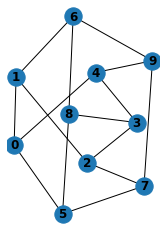

In [82]:
import matplotlib.pyplot as plt
G = nx.petersen_graph()
plt.subplot(121)
#matplotlib.axes._subplots.AxesSubplot object at ...
nx.draw(G, with_labels=True, font_weight='bold')
